In [53]:
import pandas as pd
import numpy as np

# 10.1 Решающее дерево

Посмотрим, как обучать решающие деревья в python.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Будем предсказывать стоимость домов в Калифорнии.

In [34]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [35]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разобъем данные на тренировочную и тестовые части. Обучим дерево на трейне и оценим качество ($R^2$) на тесте.

In [36]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [37]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [38]:
from sklearn.metrics import r2_score

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.6064721951097465

In [39]:
pred_train = model.predict(Xtrain)

r2_score(ytrain, pred_train)

1.0

Дерево сильно переобучилось!

Попробуем ограничить его по глубине.

2 0.45120526546918793 0.4308859489546041
4 0.5881529015244183 0.5667458138420973
6 0.6735290661749251 0.63493185070596
8 0.7551678130970392 0.6757269679959721
10 0.8322088758923646 0.6870841434927679
12 0.898085527028839 0.6650276867772998
14 0.9446411229582562 0.6388072007649603
16 0.9733697013892558 0.6244305636591967
18 0.9891436686412136 0.6145830789348086
20 0.995943271035502 0.6085093978607483
22 0.9985399910070567 0.6027842820154159
24 0.9996017215698247 0.6077451477613374


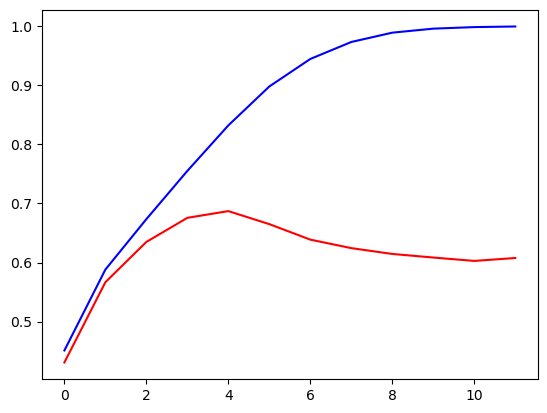

In [40]:
from matplotlib import pyplot as plt

train_scores = []
test_scores = []
depth_range = range(2, 26, 2)
for depth in depth_range:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    train_r2 = r2_score(ytrain, pred_train)
    test_r2 = r2_score(ytest, pred_test)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(depth, train_r2, test_r2)

plt.plot(train_scores, color='blue')
plt.plot(test_scores, color='red')
plt.show();

Кросс-валидация

Судя по результатам эксперимента, оптимальная глубина дерева max_depth = 8. Но это мы узнали по конкретному разбиению на train-test.

Чтобы не привязываться к конкретному разбиению, можно посмотреть качество модели по кросс-валидации.

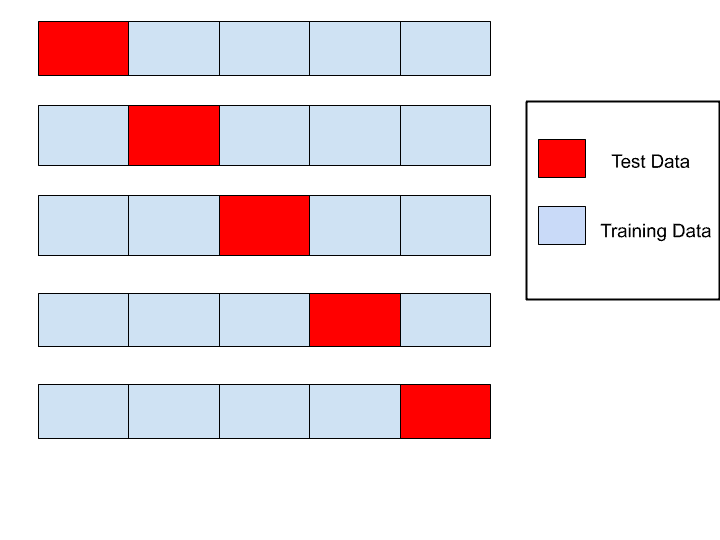

In [41]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(max_depth = 8)

cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.47424739, 0.6052379 , 0.46762928])

In [42]:
cross_val_score(model, X, y, cv=3, scoring='r2').mean()

0.5148001154402944

Решающее дерево можно визуализировать.

Это очень удобно для интерпретации результатов.

In [43]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [44]:
import dtreeviz

viz_model = dtreeviz.model(model, Xtrain, ytrain,
                           feature_names=Xtrain.columns)

viz_model.view(fancy = False, scale = 2)

# 10.2 Обучение решающих деревьев